In [88]:
'''
Training a fully supervised one layer NMF on 20 news group dataset
'''
# define some global variables
save_PATH = 'saved_data/'
save_filename = 'supervised_one_layer_pinv_run2'

In [89]:
# import package
%load_ext memory_profiler
import torch
from torch.autograd import Variable
import Ipynb_importer
from deep_nmf import Deep_NMF, Energy_Loss_Func, Fro_Norm
from writer import Writer
from matplotlib import pyplot as plt
import numpy as np
from auxillary_functions import *
from pinv import PinvF

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [90]:
# load the dataset for twenty news
from twenty_news_group_data_loading import data, Y, target,L20, L50, L90, sparsedata_cr_entr, sparsedata_L2

In [164]:
# Define the network 
m = data.shape[1]
k = 20
c = 20
lambd = 1e-4
net = Deep_NMF([m, k])
loss_func = Energy_Loss_Func(lambd = lambd, classification_type = 'L2')
data_input = data*1000
dataset = sparsedata_L2(data_input, 1000*Y)
criterion = Fro_Norm()
pinv = PinvF.apply

In [165]:
# try initializing the network with the unsupervised version
#A = np.load(save_PATH + '20_news_group_A.npy')
#net.lsqnonneglst[0].A.data = torch.from_numpy(A)

In [166]:
# Training process!
import time
# setting training parameters
batchsize = 40
epoch = 5
lr = 5000
lr_nmf = 5000
lr_cl = 5000
loss_lst = []
# train!
for epo in range(epoch):
    dataloader = torch.utils.data.DataLoader(dataset, batch_size = batchsize, shuffle = True)
    total_loss = 0
    for (i, (inputs, label)) in enumerate(dataloader):
        t1 = time.time()
        inputs = inputs.view([inputs.shape[0], inputs.shape[2]])
        label = label.view([label.shape[0], -1])
        inputs, label = Variable(inputs), Variable(label)
       #train the lsqnonneg layers
        net.zero_grad()
        S_lst = net(inputs)
        S = S_lst[-1]
        B = pinv(S)
        B = torch.mm(pinv(S),label)
        pred = torch.mm(S,B)
        loss = loss_func(inputs, S_lst,list(net.lsqnonneglst.parameters()),pred,label)
        loss.backward()
        loss_lst.append(loss.data)
        total_loss += loss.data
        print('current at batch:', i+1, loss.data)
        t2 = time.time()
        print(t2 - t1)
        for A in net.parameters():
            A.data = A.data.sub_(lr*A.grad.data)
        for A in net.lsqnonneglst.parameters():
            A.data = A.data.clamp(min = 0)
    print('epoch = ', epo, '\n', total_loss)

current at batch: 1 tensor(10.0113, dtype=torch.float64)
9.946182012557983
current at batch: 2 tensor(9.1165, dtype=torch.float64)
6.87500524520874
current at batch: 3 tensor(9.3729, dtype=torch.float64)
6.507164716720581
current at batch: 4 tensor(9.5512, dtype=torch.float64)
6.8034987449646
current at batch: 5 tensor(9.3837, dtype=torch.float64)
6.655431270599365
current at batch: 6 tensor(9.2185, dtype=torch.float64)
6.187631368637085
current at batch: 7 tensor(9.1113, dtype=torch.float64)
5.296981334686279
current at batch: 8 tensor(9.0991, dtype=torch.float64)
6.1240363121032715
current at batch: 9 tensor(9.2288, dtype=torch.float64)
6.406382322311401
current at batch: 10 tensor(9.1096, dtype=torch.float64)
6.867548942565918
current at batch: 11 tensor(9.3226, dtype=torch.float64)
6.955356121063232
current at batch: 12 tensor(8.8933, dtype=torch.float64)
6.5497214794158936
current at batch: 13 tensor(8.8484, dtype=torch.float64)
6.064436912536621
current at batch: 14 tensor(9.2586

current at batch: 111 tensor(7.7038, dtype=torch.float64)
9.091758966445923
current at batch: 112 tensor(7.8617, dtype=torch.float64)
7.6046624183654785
current at batch: 113 tensor(7.0926, dtype=torch.float64)
8.104194164276123
current at batch: 114 tensor(7.7580, dtype=torch.float64)
9.484628200531006
current at batch: 115 tensor(7.1492, dtype=torch.float64)
9.56841254234314
current at batch: 116 tensor(7.5726, dtype=torch.float64)
7.689764499664307
current at batch: 117 tensor(7.3642, dtype=torch.float64)
8.293324708938599
current at batch: 118 tensor(7.3929, dtype=torch.float64)
9.625255584716797
current at batch: 119 tensor(7.5185, dtype=torch.float64)
8.77468729019165
current at batch: 120 tensor(7.2447, dtype=torch.float64)
6.853615999221802
current at batch: 121 tensor(7.2560, dtype=torch.float64)
8.103506565093994
current at batch: 122 tensor(7.3591, dtype=torch.float64)
9.453375816345215
current at batch: 123 tensor(7.3371, dtype=torch.float64)
8.859471559524536
current at ba

current at batch: 219 tensor(7.4931, dtype=torch.float64)
9.304765462875366
current at batch: 220 tensor(7.0710, dtype=torch.float64)
8.85907793045044
current at batch: 221 tensor(7.8482, dtype=torch.float64)
9.04118013381958
current at batch: 222 tensor(7.4810, dtype=torch.float64)
9.840965270996094
current at batch: 223 tensor(7.0042, dtype=torch.float64)
9.875472784042358
current at batch: 224 tensor(7.1096, dtype=torch.float64)
8.950500726699829
current at batch: 225 tensor(7.3543, dtype=torch.float64)
9.451038599014282
current at batch: 226 tensor(7.3286, dtype=torch.float64)
10.628004312515259
current at batch: 227 tensor(7.1947, dtype=torch.float64)
10.987698554992676
current at batch: 228 tensor(6.8015, dtype=torch.float64)
9.252475500106812
current at batch: 229 tensor(7.1332, dtype=torch.float64)
9.765216827392578
current at batch: 230 tensor(7.3635, dtype=torch.float64)
10.64740777015686
current at batch: 231 tensor(7.3280, dtype=torch.float64)
10.661463737487793
current at 

current at batch: 327 tensor(6.7491, dtype=torch.float64)
11.031472444534302
current at batch: 328 tensor(6.3213, dtype=torch.float64)
8.871115446090698
current at batch: 329 tensor(6.9525, dtype=torch.float64)
9.732177495956421
current at batch: 330 tensor(7.5666, dtype=torch.float64)
10.685222387313843
current at batch: 331 tensor(7.3824, dtype=torch.float64)
7.481573581695557
current at batch: 332 tensor(7.5520, dtype=torch.float64)
7.085756778717041
current at batch: 333 tensor(7.1497, dtype=torch.float64)
6.441037893295288
current at batch: 334 tensor(7.0092, dtype=torch.float64)
7.192878723144531
current at batch: 335 tensor(7.2646, dtype=torch.float64)
8.547110080718994
current at batch: 336 tensor(6.5268, dtype=torch.float64)
10.594608068466187
current at batch: 337 tensor(6.8664, dtype=torch.float64)
8.507190942764282
current at batch: 338 tensor(7.2930, dtype=torch.float64)
9.724013805389404
current at batch: 339 tensor(6.9934, dtype=torch.float64)
10.20996904373169
current a

current at batch: 435 tensor(6.9688, dtype=torch.float64)
11.154439210891724
current at batch: 436 tensor(6.1532, dtype=torch.float64)
11.719000577926636
current at batch: 437 tensor(7.0349, dtype=torch.float64)
11.78791356086731
current at batch: 438 tensor(7.0449, dtype=torch.float64)
11.288037538528442
current at batch: 439 tensor(6.3346, dtype=torch.float64)
11.898021459579468
current at batch: 440 tensor(6.8903, dtype=torch.float64)
9.981716871261597
current at batch: 441 tensor(6.5846, dtype=torch.float64)
9.893383264541626
current at batch: 442 tensor(6.9933, dtype=torch.float64)
11.718990802764893
current at batch: 443 tensor(6.9326, dtype=torch.float64)
9.940128087997437
current at batch: 444 tensor(6.4346, dtype=torch.float64)
10.615341424942017
current at batch: 445 tensor(6.5269, dtype=torch.float64)
11.026273965835571
current at batch: 446 tensor(6.6206, dtype=torch.float64)
9.71097445487976
current at batch: 447 tensor(6.5374, dtype=torch.float64)
11.798644781112671
curre

current at batch: 71 tensor(6.3355, dtype=torch.float64)
9.867936611175537
current at batch: 72 tensor(6.7538, dtype=torch.float64)
9.923271179199219
current at batch: 73 tensor(6.6218, dtype=torch.float64)
9.356145858764648
current at batch: 74 tensor(7.2585, dtype=torch.float64)
9.859304428100586
current at batch: 75 tensor(6.8544, dtype=torch.float64)
10.181373596191406
current at batch: 76 tensor(7.1437, dtype=torch.float64)
9.531902551651001
current at batch: 77 tensor(7.0130, dtype=torch.float64)
9.21696138381958
current at batch: 78 tensor(6.8864, dtype=torch.float64)
10.224200010299683
current at batch: 79 tensor(6.7354, dtype=torch.float64)
9.744292736053467
current at batch: 80 tensor(6.9047, dtype=torch.float64)
9.761232614517212
current at batch: 81 tensor(6.7076, dtype=torch.float64)
8.986642122268677
current at batch: 82 tensor(6.9527, dtype=torch.float64)
8.761463403701782
current at batch: 83 tensor(7.1194, dtype=torch.float64)
8.684394121170044
current at batch: 84 ten

current at batch: 180 tensor(6.8783, dtype=torch.float64)
8.078287839889526
current at batch: 181 tensor(6.9075, dtype=torch.float64)
7.781985521316528
current at batch: 182 tensor(6.2791, dtype=torch.float64)
7.797043085098267
current at batch: 183 tensor(6.3773, dtype=torch.float64)
7.620650768280029
current at batch: 184 tensor(6.5287, dtype=torch.float64)
8.0233736038208
current at batch: 185 tensor(5.9981, dtype=torch.float64)
8.113088846206665
current at batch: 186 tensor(6.3080, dtype=torch.float64)
8.017477035522461
current at batch: 187 tensor(6.3300, dtype=torch.float64)
7.593899488449097
current at batch: 188 tensor(7.4133, dtype=torch.float64)
7.792729139328003
current at batch: 189 tensor(6.7291, dtype=torch.float64)
8.168924331665039
current at batch: 190 tensor(7.0127, dtype=torch.float64)
8.640803813934326
current at batch: 191 tensor(6.7876, dtype=torch.float64)
8.552472829818726
current at batch: 192 tensor(6.8514, dtype=torch.float64)
7.825916290283203
current at bat

current at batch: 288 tensor(6.6309, dtype=torch.float64)
8.253637313842773
current at batch: 289 tensor(6.8472, dtype=torch.float64)
8.531424760818481
current at batch: 290 tensor(6.5931, dtype=torch.float64)
8.250166177749634
current at batch: 291 tensor(6.2857, dtype=torch.float64)
7.854451656341553
current at batch: 292 tensor(6.3028, dtype=torch.float64)
7.687385082244873
current at batch: 293 tensor(6.9238, dtype=torch.float64)
7.970120191574097
current at batch: 294 tensor(6.5535, dtype=torch.float64)
8.203290462493896
current at batch: 295 tensor(6.5374, dtype=torch.float64)
8.828312158584595
current at batch: 296 tensor(6.4908, dtype=torch.float64)
7.556117057800293
current at batch: 297 tensor(6.4445, dtype=torch.float64)
7.808705806732178
current at batch: 298 tensor(6.1295, dtype=torch.float64)
7.656423807144165
current at batch: 299 tensor(6.3977, dtype=torch.float64)
8.672051906585693
current at batch: 300 tensor(6.8998, dtype=torch.float64)
8.34461259841919
current at ba

current at batch: 396 tensor(6.4047, dtype=torch.float64)
7.821781635284424
current at batch: 397 tensor(6.4069, dtype=torch.float64)
7.422024726867676
current at batch: 398 tensor(7.0603, dtype=torch.float64)
8.562674045562744
current at batch: 399 tensor(6.7221, dtype=torch.float64)
7.797046661376953
current at batch: 400 tensor(6.7844, dtype=torch.float64)
7.974440813064575
current at batch: 401 tensor(7.0844, dtype=torch.float64)
8.184546709060669
current at batch: 402 tensor(6.1939, dtype=torch.float64)
8.031411409378052
current at batch: 403 tensor(6.1471, dtype=torch.float64)
7.651712894439697
current at batch: 404 tensor(6.3547, dtype=torch.float64)
8.043872117996216
current at batch: 405 tensor(6.7453, dtype=torch.float64)
8.768602848052979
current at batch: 406 tensor(6.5800, dtype=torch.float64)
8.203311443328857
current at batch: 407 tensor(6.1819, dtype=torch.float64)
8.297042608261108
current at batch: 408 tensor(6.6556, dtype=torch.float64)
8.367629289627075
current at b

current at batch: 32 tensor(6.4116, dtype=torch.float64)
7.3439109325408936
current at batch: 33 tensor(6.3464, dtype=torch.float64)
7.306866407394409
current at batch: 34 tensor(6.7929, dtype=torch.float64)
8.277787208557129
current at batch: 35 tensor(6.4739, dtype=torch.float64)
7.43764591217041
current at batch: 36 tensor(6.3566, dtype=torch.float64)
7.562655687332153
current at batch: 37 tensor(6.8560, dtype=torch.float64)
7.701962947845459
current at batch: 38 tensor(6.2793, dtype=torch.float64)
7.4563188552856445
current at batch: 39 tensor(6.5153, dtype=torch.float64)
7.747666835784912
current at batch: 40 tensor(6.3795, dtype=torch.float64)
7.406407117843628
current at batch: 41 tensor(6.6542, dtype=torch.float64)
7.934751749038696
current at batch: 42 tensor(6.7069, dtype=torch.float64)
7.578277587890625
current at batch: 43 tensor(6.3416, dtype=torch.float64)
7.377512454986572
current at batch: 44 tensor(6.6030, dtype=torch.float64)
7.195460557937622
current at batch: 45 ten

current at batch: 141 tensor(6.9223, dtype=torch.float64)
7.6433491706848145
current at batch: 142 tensor(6.5438, dtype=torch.float64)
7.1563990116119385
current at batch: 143 tensor(6.2578, dtype=torch.float64)
7.547030210494995
current at batch: 144 tensor(6.3249, dtype=torch.float64)
7.953295469284058
current at batch: 145 tensor(7.0784, dtype=torch.float64)
8.156418085098267
current at batch: 146 tensor(6.5120, dtype=torch.float64)
7.4712207317352295
current at batch: 147 tensor(6.2916, dtype=torch.float64)
7.416017770767212
current at batch: 148 tensor(6.8012, dtype=torch.float64)
7.84397029876709
current at batch: 149 tensor(6.4819, dtype=torch.float64)
7.656453609466553
current at batch: 150 tensor(6.2579, dtype=torch.float64)
7.765835762023926
current at batch: 151 tensor(6.7955, dtype=torch.float64)
7.921887636184692
current at batch: 152 tensor(5.9530, dtype=torch.float64)
7.343945264816284
current at batch: 153 tensor(6.2740, dtype=torch.float64)
7.437696695327759
current at

current at batch: 249 tensor(6.1804, dtype=torch.float64)
7.584090232849121
current at batch: 250 tensor(6.4592, dtype=torch.float64)
9.144497632980347
current at batch: 251 tensor(6.2435, dtype=torch.float64)
8.43339729309082
current at batch: 252 tensor(6.6691, dtype=torch.float64)
7.840100288391113
current at batch: 253 tensor(6.7742, dtype=torch.float64)
8.38043212890625
current at batch: 254 tensor(6.5617, dtype=torch.float64)
7.7814037799835205
current at batch: 255 tensor(5.9455, dtype=torch.float64)
7.984541177749634
current at batch: 256 tensor(6.2320, dtype=torch.float64)
8.070345163345337
current at batch: 257 tensor(5.9753, dtype=torch.float64)
7.828283786773682
current at batch: 258 tensor(5.9706, dtype=torch.float64)
8.189793109893799
current at batch: 259 tensor(6.0581, dtype=torch.float64)
7.672037839889526
current at batch: 260 tensor(5.9532, dtype=torch.float64)
8.225680112838745
current at batch: 261 tensor(6.6988, dtype=torch.float64)
8.093984603881836
current at ba

current at batch: 358 tensor(6.4913, dtype=torch.float64)
8.015786170959473
current at batch: 359 tensor(6.3530, dtype=torch.float64)
7.640779495239258
current at batch: 360 tensor(6.6187, dtype=torch.float64)
8.03141474723816
current at batch: 361 tensor(6.2319, dtype=torch.float64)
8.139447689056396
current at batch: 362 tensor(6.0937, dtype=torch.float64)
7.8745152950286865
current at batch: 363 tensor(6.4328, dtype=torch.float64)
7.587134122848511
current at batch: 364 tensor(6.5545, dtype=torch.float64)
8.204322576522827
current at batch: 365 tensor(6.5045, dtype=torch.float64)
7.9948859214782715
current at batch: 366 tensor(6.0991, dtype=torch.float64)
7.95329475402832
current at batch: 367 tensor(5.8994, dtype=torch.float64)
7.857948541641235
current at batch: 368 tensor(6.3275, dtype=torch.float64)
7.906355619430542
current at batch: 369 tensor(5.9486, dtype=torch.float64)
8.127097606658936
current at batch: 370 tensor(5.7934, dtype=torch.float64)
8.280229091644287
current at b

current at batch: 466 tensor(6.2043, dtype=torch.float64)
8.471266746520996
current at batch: 467 tensor(5.4008, dtype=torch.float64)
9.964880228042603
current at batch: 468 tensor(6.4595, dtype=torch.float64)
12.515844106674194
current at batch: 469 tensor(6.1042, dtype=torch.float64)
11.019016981124878
current at batch: 470 tensor(5.7977, dtype=torch.float64)
10.858993530273438
current at batch: 471 tensor(5.9395, dtype=torch.float64)
10.831700563430786
current at batch: 472 tensor(4.5400, dtype=torch.float64)
1.4531543254852295
epoch =  2 
 tensor(2967.9790, dtype=torch.float64)
current at batch: 1 tensor(6.1798, dtype=torch.float64)
10.39538025856018
current at batch: 2 tensor(5.4640, dtype=torch.float64)
9.531263589859009
current at batch: 3 tensor(6.0657, dtype=torch.float64)
10.434920072555542
current at batch: 4 tensor(5.5381, dtype=torch.float64)
10.49474048614502
current at batch: 5 tensor(6.0117, dtype=torch.float64)
10.063828229904175
current at batch: 6 tensor(6.4568, dtyp

current at batch: 102 tensor(6.0273, dtype=torch.float64)
7.753639221191406
current at batch: 103 tensor(6.6197, dtype=torch.float64)
7.611834526062012
current at batch: 104 tensor(6.4645, dtype=torch.float64)
8.453349828720093
current at batch: 105 tensor(6.2418, dtype=torch.float64)
8.076564311981201
current at batch: 106 tensor(6.3996, dtype=torch.float64)
8.109591722488403
current at batch: 107 tensor(5.8811, dtype=torch.float64)
7.710891962051392
current at batch: 108 tensor(6.0319, dtype=torch.float64)
7.750204801559448
current at batch: 109 tensor(5.8696, dtype=torch.float64)
7.890835285186768
current at batch: 110 tensor(5.8004, dtype=torch.float64)
7.4533281326293945
current at batch: 111 tensor(6.2878, dtype=torch.float64)
8.465172052383423
current at batch: 112 tensor(6.1924, dtype=torch.float64)
8.706313610076904
current at batch: 113 tensor(6.2344, dtype=torch.float64)
7.547065019607544
current at batch: 114 tensor(6.0887, dtype=torch.float64)
7.82833194732666
current at b

current at batch: 210 tensor(5.8929, dtype=torch.float64)
7.670681476593018
current at batch: 211 tensor(6.2139, dtype=torch.float64)
7.905567646026611
current at batch: 212 tensor(5.9899, dtype=torch.float64)
7.453275680541992
current at batch: 213 tensor(5.9834, dtype=torch.float64)
7.628714084625244
current at batch: 214 tensor(6.0389, dtype=torch.float64)
7.936647415161133
current at batch: 215 tensor(5.6010, dtype=torch.float64)
6.953265428543091
current at batch: 216 tensor(6.0762, dtype=torch.float64)
7.48454737663269
current at batch: 217 tensor(6.9638, dtype=torch.float64)
8.177958726882935
current at batch: 218 tensor(6.0461, dtype=torch.float64)
7.532344341278076
current at batch: 219 tensor(6.4004, dtype=torch.float64)
7.795900583267212
current at batch: 220 tensor(5.8288, dtype=torch.float64)
7.250150442123413
current at batch: 221 tensor(5.9404, dtype=torch.float64)
8.16051459312439
current at batch: 222 tensor(6.2297, dtype=torch.float64)
10.256023645401001
current at ba

current at batch: 317 tensor(6.7141, dtype=torch.float64)
13.252708673477173
current at batch: 318 tensor(5.8737, dtype=torch.float64)
14.534344673156738
current at batch: 319 tensor(6.2720, dtype=torch.float64)
11.988856077194214
current at batch: 320 tensor(6.4944, dtype=torch.float64)
11.637686252593994
current at batch: 321 tensor(6.5209, dtype=torch.float64)
15.04266619682312
current at batch: 322 tensor(6.5857, dtype=torch.float64)
13.788320064544678
current at batch: 323 tensor(6.0401, dtype=torch.float64)
13.292675971984863
current at batch: 324 tensor(6.1279, dtype=torch.float64)
13.912520170211792
current at batch: 325 tensor(5.7922, dtype=torch.float64)
12.298288106918335
current at batch: 326 tensor(6.1639, dtype=torch.float64)
14.088367223739624
current at batch: 327 tensor(6.2297, dtype=torch.float64)
13.093170642852783
current at batch: 328 tensor(6.1520, dtype=torch.float64)
13.852466344833374
current at batch: 329 tensor(5.8517, dtype=torch.float64)
13.37314224243164
c

current at batch: 424 tensor(5.9523, dtype=torch.float64)
13.422230005264282
current at batch: 425 tensor(6.2020, dtype=torch.float64)
13.893500328063965
current at batch: 426 tensor(6.3046, dtype=torch.float64)
13.745432376861572
current at batch: 427 tensor(6.0044, dtype=torch.float64)
14.562891006469727
current at batch: 428 tensor(6.2974, dtype=torch.float64)
13.670210123062134
current at batch: 429 tensor(6.1544, dtype=torch.float64)
11.953449964523315
current at batch: 430 tensor(6.6081, dtype=torch.float64)
13.674748420715332
current at batch: 431 tensor(6.1543, dtype=torch.float64)
14.779008388519287
current at batch: 432 tensor(6.1216, dtype=torch.float64)
14.450751066207886
current at batch: 433 tensor(5.8818, dtype=torch.float64)
13.094046115875244
current at batch: 434 tensor(6.0744, dtype=torch.float64)
13.547149896621704
current at batch: 435 tensor(6.5869, dtype=torch.float64)
12.75434160232544
current at batch: 436 tensor(6.0745, dtype=torch.float64)
13.062769174575806


current at batch: 59 tensor(5.8785, dtype=torch.float64)
12.761072635650635
current at batch: 60 tensor(6.2095, dtype=torch.float64)
12.031501531600952
current at batch: 61 tensor(6.3492, dtype=torch.float64)
14.763693571090698
current at batch: 62 tensor(5.7830, dtype=torch.float64)
13.672152519226074
current at batch: 63 tensor(6.0354, dtype=torch.float64)
12.672144651412964
current at batch: 64 tensor(5.8511, dtype=torch.float64)
13.742508172988892
current at batch: 65 tensor(6.0067, dtype=torch.float64)
12.750262022018433
current at batch: 66 tensor(5.9892, dtype=torch.float64)
13.359643936157227
current at batch: 67 tensor(6.0925, dtype=torch.float64)
14.258811235427856
current at batch: 68 tensor(5.7902, dtype=torch.float64)
13.434951066970825
current at batch: 69 tensor(6.1744, dtype=torch.float64)
12.649287462234497
current at batch: 70 tensor(5.4068, dtype=torch.float64)
15.159606695175171
current at batch: 71 tensor(6.1481, dtype=torch.float64)
13.500281810760498
current at b

current at batch: 167 tensor(5.5864, dtype=torch.float64)
14.5784170627594
current at batch: 168 tensor(6.0190, dtype=torch.float64)
12.83628225326538
current at batch: 169 tensor(5.9085, dtype=torch.float64)
15.208360195159912
current at batch: 170 tensor(5.8717, dtype=torch.float64)
14.062788724899292
current at batch: 171 tensor(5.6767, dtype=torch.float64)
14.781561613082886
current at batch: 172 tensor(6.1406, dtype=torch.float64)
14.790571212768555
current at batch: 173 tensor(5.2797, dtype=torch.float64)
11.611958742141724
current at batch: 174 tensor(6.0753, dtype=torch.float64)
15.982859373092651
current at batch: 175 tensor(6.1835, dtype=torch.float64)
13.21177625656128
current at batch: 176 tensor(5.8878, dtype=torch.float64)
12.781509160995483
current at batch: 177 tensor(5.3835, dtype=torch.float64)
13.90653133392334
current at batch: 178 tensor(5.9389, dtype=torch.float64)
14.586883306503296
current at batch: 179 tensor(5.9769, dtype=torch.float64)
14.037584066390991
curr

current at batch: 274 tensor(5.6349, dtype=torch.float64)
12.672135591506958
current at batch: 275 tensor(5.4272, dtype=torch.float64)
12.736984729766846
current at batch: 276 tensor(6.4185, dtype=torch.float64)
12.062743186950684
current at batch: 277 tensor(6.3388, dtype=torch.float64)
12.828396320343018
current at batch: 278 tensor(5.2459, dtype=torch.float64)
12.890886306762695
current at batch: 279 tensor(6.0065, dtype=torch.float64)
12.533992767333984
current at batch: 280 tensor(5.8470, dtype=torch.float64)
12.741823196411133
current at batch: 281 tensor(5.9471, dtype=torch.float64)
14.328423976898193
current at batch: 282 tensor(5.7751, dtype=torch.float64)
12.464510202407837
current at batch: 283 tensor(5.8447, dtype=torch.float64)
14.6631178855896
current at batch: 284 tensor(6.1396, dtype=torch.float64)
14.76591682434082
current at batch: 285 tensor(5.9679, dtype=torch.float64)
13.500474691390991
current at batch: 286 tensor(5.6215, dtype=torch.float64)
12.984636545181274
cu

current at batch: 381 tensor(6.1700, dtype=torch.float64)
12.312750101089478
current at batch: 382 tensor(5.9395, dtype=torch.float64)
15.103827953338623
current at batch: 383 tensor(5.7587, dtype=torch.float64)
13.125266551971436
current at batch: 384 tensor(5.9659, dtype=torch.float64)
12.660419464111328
current at batch: 385 tensor(6.1631, dtype=torch.float64)
14.499216079711914
current at batch: 386 tensor(5.6903, dtype=torch.float64)
12.057693243026733
current at batch: 387 tensor(5.5181, dtype=torch.float64)
12.56275200843811
current at batch: 388 tensor(5.9387, dtype=torch.float64)
12.890887022018433
current at batch: 389 tensor(5.5932, dtype=torch.float64)
12.220235586166382
current at batch: 390 tensor(6.5107, dtype=torch.float64)
12.715786457061768
current at batch: 391 tensor(5.1773, dtype=torch.float64)
14.094038486480713
current at batch: 392 tensor(5.9222, dtype=torch.float64)
11.625239372253418
current at batch: 393 tensor(6.0191, dtype=torch.float64)
15.197709083557129


In [96]:
# save the data
np.savez(save_PATH + save_filename,
         param_lst = list(net.parameters()), loss_lst = loss_lst)

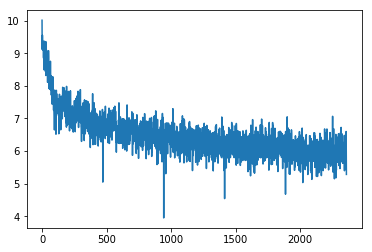

In [167]:
# plot the loss curve
# plt.plot(loss_lst)
# plt.show()

In [168]:
history = Writer()
for A in net.parameters():
    A.requires_grad = False
n = 18846
for i in range(n):
    if (i+1)%100 == 0:
        print('current at batch:', i+1)
    total_data = dataset[i]
    inputs,label = total_data
    S_lst = net(inputs)
    S = S_lst[-1] 
    history.add_tensor('S', S)

current at batch: 100
current at batch: 200
current at batch: 300
current at batch: 400
current at batch: 500
current at batch: 600
current at batch: 700
current at batch: 800
current at batch: 900
current at batch: 1000
current at batch: 1100
current at batch: 1200
current at batch: 1300
current at batch: 1400
current at batch: 1500
current at batch: 1600
current at batch: 1700
current at batch: 1800
current at batch: 1900
current at batch: 2000
current at batch: 2100
current at batch: 2200
current at batch: 2300
current at batch: 2400
current at batch: 2500
current at batch: 2600
current at batch: 2700
current at batch: 2800
current at batch: 2900
current at batch: 3000
current at batch: 3100
current at batch: 3200
current at batch: 3300
current at batch: 3400
current at batch: 3500
current at batch: 3600
current at batch: 3700
current at batch: 3800
current at batch: 3900
current at batch: 4000
current at batch: 4100
current at batch: 4200
current at batch: 4300
current at batch: 44

In [169]:
S = history.get('S')

In [170]:
S1 = torch.cat(S,0)
print(S1.shape)

torch.Size([18846, 20])


In [171]:
S_np = S1.numpy()
inv_S = np.linalg.pinv(S_np)
Y_sub = Y[0:n,:]
Y_pred = S_np@(inv_S@Y_sub)

In [172]:
sum(np.argmax(Y_pred,1) == np.argmax(Y_sub,1))/n

0.6938342353815133